# Information Value (IV) and Weight of Evidence (WOE) in Python

Information value (IV) and weight of evidence (WOE) are simple and powerful techniques of conducting attribute relevance analysis. They provide a great framework for exploratory analysis and have been used extensively in the credit risk world for several decades.

This simple module enables quick attribute relevance analysis: calculation of IV and WOE, creation of readable visualizations and evaluation of statistical significance and effect size.

- In order to see how it can be used in practice, check [**Telco Customer Churn Analysis**](https://github.com/klaudia-nazarko/woe-and-iv/blob/master/telco_customer_churn_analysis.ipynb).
- What about statistical significance? Check [**Information Value vs Statistical Significance Analysis**](https://github.com/klaudia-nazarko/woe-and-iv/blob/master/statistical_significance_of_information_value.ipynb).

In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype

from Features import *
from AttributeRelevance import *

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)  

In [3]:
df = pd.read_csv('data/telco_churn.csv', na_values=[' '])

In [4]:
df.columns = [c[0].lower() + c[1:] for c in df.columns]
df['label'] = df['churn'].map({'Yes': 0, 'No': 1})
df['seniorCitizen'] = df['seniorCitizen'].map({1: 'Yes', 0: 'No'})
df.drop(['customerID', 'churn'], axis=1, inplace=True)

In [5]:
df.sample(5)

,gender,seniorCitizen,partner,dependents,tenure,phoneService,multipleLines,internetService,onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges,label
94,Male,No,No,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),100.90,"7,459.05",1
14,Male,No,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,"2,686.05",1
6381,Male,No,No,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,1
6869,Female,No,Yes,Yes,45,Yes,No,DSL,No,Yes,No,Yes,No,No,One year,Yes,Credit card (automatic),54.15,"2,319.80",0
4217,Male,Yes,Yes,No,14,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.10,"1,013.35",1


## Create Feature Objects

Basic object in IV & WOE analysis is a single feature. There are two types of features: categorical and continuous.

Create feature objects by instantiating CategoricalFeature and ContinuousFeature class.

**CategoricalFeature(df, colname)**

Creates a feature object.
* df - DataFrame with data
* colname - name of the column containing a feature

Attributes and methods:
* feature - returns name of a column
* df - returns a dataframe
* df_lite - returns a new dataframe limited to bin and label

**ContinuousFeature(df, colname)**

Creates a feature object. Groups continuous values into bins.
* df - DataFrame with data
* colname - name of the column containing a feature

Attributes and methods:
* feature - returns name of a column
* df - returns a dataframe
* df_lite - returns a new dataframe limited to bin and label

In [6]:
feat_gender = CategoricalFeature(df, 'gender')
feat_charges = ContinuousFeature(df, 'totalCharges')
feat_contract = CategoricalFeature(df, 'contract')
feat_tenure = ContinuousFeature(df, 'tenure')

In [7]:
feat_gender.df_lite.head()

,bin,label
0,Female,1
1,Male,1
2,Male,0
3,Male,1
4,Female,0


Create a list of features that will be analyzed. It can be done manually or dynamically, as below:

In [8]:
feats_manual = [feat_gender, feat_charges, feat_contract, feat_tenure]

In [9]:
feats_dict = {}

for col in [c for c in df.columns if c != 'label']:
    if is_numeric_dtype(df[col]):
        feats_dict[col] = ContinuousFeature(df, col)
    else:
        feats_dict[col] = CategoricalFeature(df, col)

feats = list(feats_dict.values())

## Information Value Class

**IV()**

Attributes and methods:
- group_by_feature(feature) - returns a dataframe with number of observations in each bin and count of good and bad
- calculate_iv(feature) - returns a dataframe (with calculation of WOE and IV) and IV for a single feature
- draw_woe(feature) - draws a chart with visualization of WOE values for a single feature
- interpretation(iv_value) - returns the predictive power based on input IV
- interpret_iv(feature) - returns the predictive power based on IV of a single feature
- print_iv(feature) - prints interpretation of IV of a single feature

In [10]:
iv = IV()

In [11]:
iv.group_by_feature(feat_charges)

,totalCharges,count,good,bad
0,18.80,1172,599,573
1,197.95,1172,819,353
2,678.37,1172,889,283
3,"1,397.47",1172,899,273
4,"2,745.37",1172,944,228
5,"4,919.84",1172,1013,159
6,MISSING,11,11,0


In [12]:
iv_df, iv_value = iv.calculate_iv(feat_charges)
display(iv_df)
print('Information value: ', iv_value)

,totalCharges,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,18.80,1172,599,573,0.12,0.31,-0.19,-0.97,0.19
1,197.95,1172,819,353,0.16,0.19,-0.03,-0.18,0.01
2,678.37,1172,889,283,0.17,0.15,0.02,0.13,0.00
3,"1,397.47",1172,899,273,0.17,0.15,0.03,0.17,0.00
4,"2,745.37",1172,944,228,0.18,0.12,0.06,0.40,0.02
5,"4,919.84",1172,1013,159,0.20,0.09,0.11,0.83,0.09
6,MISSING,11,11,0,0.00,0.00,0.00,0.00,0.00


Information value:  0.3152298256031499


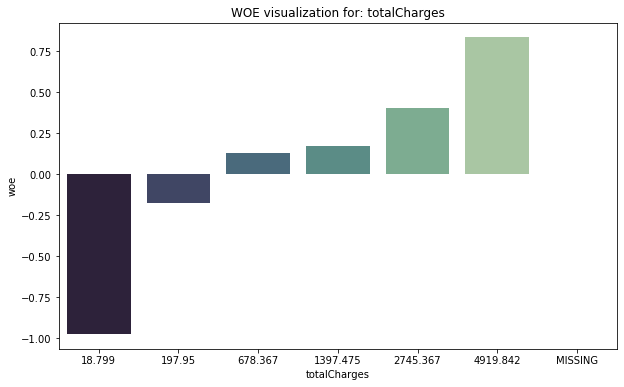

In [13]:
iv.draw_woe(feat_charges)

In [14]:
print('%s is a %s predictor.' % (feat_charges.feature.capitalize(), iv.interpret_iv(feat_charges)))
print('A feature with IV = 0.2 is a %s predictor.' % iv.interpretation(0.2))
print()
iv.print_iv(feat_charges)

Totalcharges is a strong predictor.
A feature with IV = 0.2 is a medium predictor.

Information value: 0.32
Totalcharges is a strong predictor


## Statistical Significance Class

**StatsSignificance()**

Attributes and methods:
- group_by_feature(feature) - returns a dataframe with number of observations in each bin and count of good and bad
- calculate_chi(feature) - returns p-value and effect size (Cramer's V) for a single feature
- interpretation(effect_size) - returns the predictive power based on input effect size
- interpret_iv(feature) - returns the predictive power based on effect size of a single feature
- print_iv(feature) - prints interpretation of p-value and effect size of a single feature

In [15]:
s = StatsSignificance()

In [16]:
p_value, effect_size = s.calculate_chi(feat_charges)
print('p-value: %0.2f' % p_value)
print('effect size: %0.2f' % effect_size)

p-value: 0.00
effect size: 0.25


In [17]:
print('%s is a %s predictor.' % (feat_charges.feature.capitalize(), s.interpret_chi(feat_charges)))
print('A feature with effect size = 0.2 is a %s predictor.' % s.interpretation(0.2))
print()
s.print_chi(feat_charges)

Totalcharges is a medium predictor.
A feature with effect size = 0.2 is a medium predictor.

P-value: 0.00
Effect size: 0.25
Totalcharges is a medium predictor


## Attribute Relevance Class

**AttributeRelevance()**

Attributes and methods:
- bulk_iv(features_list, iv, woe_extremes=False) - returns IV for features from the list; optionally: returns min and max WOE
- bulk_stats(features_list, s) - returns p-value and effect size for features from the list
- analyze(features_list, iv, s=None, interpretation=False) - returns IV (and p-value and effect size) for features from the list; optionally: returns interpretation of predictive power based on IV and effect size

In [18]:
ar = AttributeRelevance()

In [19]:
ar.bulk_iv(feats, iv).head()

,iv
gender,0.00
seniorCitizen,0.11
partner,0.12
dependents,0.16
tenure,0.78


In [20]:
ar.bulk_iv(feats, iv, woe_extremes=True).head()

,iv,woe_min,woe_max
gender,0.00,-0.02,0.02
seniorCitizen,0.11,-0.68,0.16
partner,0.12,-0.31,0.39
dependents,0.16,-0.23,0.68
tenure,0.78,-1.27,1.87


In [21]:
ar.bulk_stats(feats, s).head()

,p-value,effect_size
gender,0.49,0.01
seniorCitizen,0.00,0.15
partner,0.00,0.15
dependents,0.00,0.16
tenure,0.00,0.37


In [22]:
ar.analyze(feats, iv).head()

,iv
contract,1.24
tenure,0.78
onlineSecurity,0.72
techSupport,0.70
internetService,0.62


In [23]:
ar.analyze(feats, iv, s).head()

,iv,p-value,effect_size
contract,1.24,0.00,0.41
tenure,0.78,0.00,0.37
onlineSecurity,0.72,0.00,0.35
techSupport,0.70,0.00,0.34
internetService,0.62,0.00,0.32


In [24]:
ar.analyze(feats, iv, s, interpretation=True).head()

,iv,p-value,effect_size,iv_interpretation,es_interpretation
contract,1.24,0.00,0.41,suspicious,strong
tenure,0.78,0.00,0.37,suspicious,medium
onlineSecurity,0.72,0.00,0.35,suspicious,medium
techSupport,0.70,0.00,0.34,suspicious,medium
internetService,0.62,0.00,0.32,suspicious,medium


## Visualizations of Information Value

**IV()**

Attributes and methods:
- draw_iv(features_list, iv) - draws a chart with visualization of IV of features from the list
- draw extremes(features_list, iv) - draws a chart with visualization of min and max WOE of features from the list
- draw multiplot(features_list, iv) - draws a multi-chart with visualization of WOE of features from the list

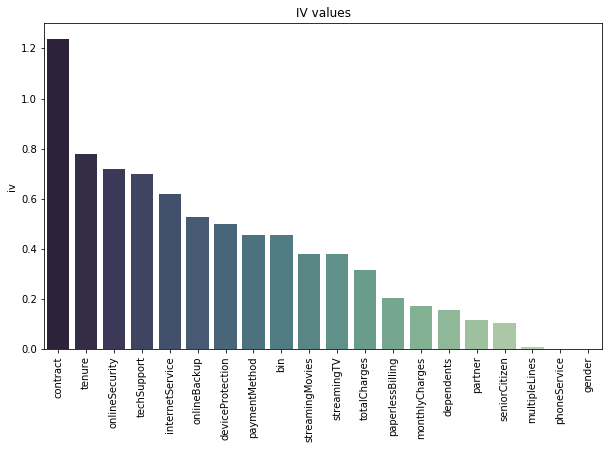

In [25]:
ar.draw_iv(feats, iv)

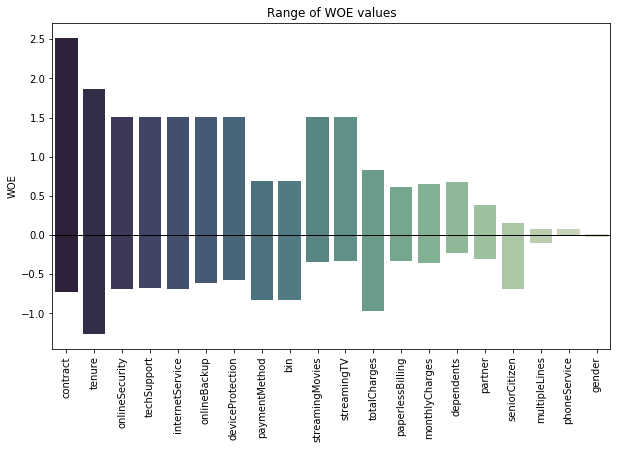

In [26]:
ar.draw_woe_extremes(feats, iv)

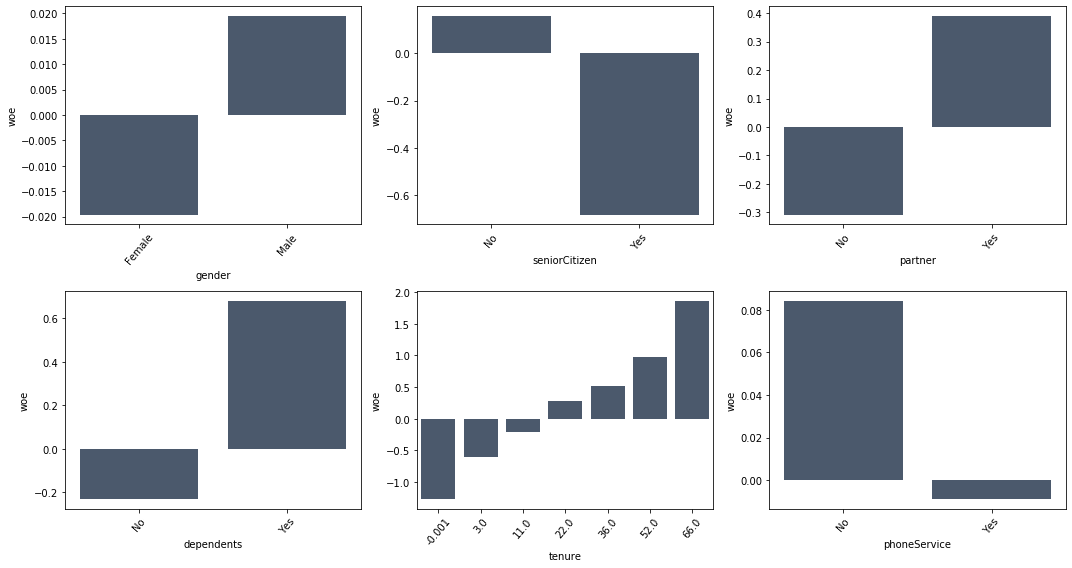

In [27]:
ar.draw_woe_multiplot(feats[:6], iv)

### Grouping continuous values into bins

Values in continuous features are grouped according to the following rules:
- Each bin should have at least 5% of the observations.
- Each bin should be non-zero for both non-events and events.
- The WOE should be monotonic, i.e. either growing or decreasing with the groupings.
- Missing values are binned separately.

### Reference

1. https://stats.stackexchange.com/questions/93170/why-do-we-calculate-information-value
2. https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html#What-is-Information-Value-IV-
3. https://towardsdatascience.com/attribute-relevance-analysis-in-python-iv-and-woe-b5651443fc04
4. https://www.kaggle.com/pavansanagapati/weight-of-evidence-woe-information-value-iv
5. https://medium.com/@sundarstyles89/weight-of-evidence-and-information-value-using-python-6f05072e83eb
6. https://multithreaded.stitchfix.com/blog/2015/08/13/weight-of-evidence/